In [ ]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_data(filename):
    return pd.read_csv(filename)

train_data = load_data(r"/content/drive/MyDrive/MLproject Dataset/Train.csv")
test_data = load_data(r"/content/drive/MyDrive/MLproject Dataset/Test.csv")
valid_data = load_data(r"/content/drive/MyDrive/MLproject Dataset/Valid.csv")



In [ ]:
def analyze_data(data):
    print("Data Analysis:")
    print("Number of rows:", len(data))
    print("Positive reviews:", len(data[data['label'] == 1]))
    print("Negative reviews:", len(data[data['label'] == 0]))
    print("Null values in 'text' column:", data['text'].isnull().sum())
    print("Null values in 'label' column:", data['label'].isnull().sum())

print("Train Data:")
analyze_data(train_data)

print("\nTest Data:")
analyze_data(test_data)

print("\nValidation Data:")
analyze_data(valid_data)

Train Data:
Data Analysis:
Number of rows: 40000
Positive reviews: 19981
Negative reviews: 20019
Null values in 'text' column: 0
Null values in 'label' column: 0

Test Data:
Data Analysis:
Number of rows: 5000
Positive reviews: 2505
Negative reviews: 2495
Null values in 'text' column: 0
Null values in 'label' column: 0

Validation Data:
Data Analysis:
Number of rows: 5000
Positive reviews: 2514
Negative reviews: 2486
Null values in 'text' column: 0
Null values in 'label' column: 0


In [ ]:
nltk.download('punkt_tab')
def preprocess_text(text):
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Tokenize
    words = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

train_data['text'] = train_data['text'].apply(preprocess_text)
test_data['text'] = test_data['text'].apply(preprocess_text)
valid_data['text'] = valid_data['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['text'])
y_train = train_data['label']

X_test = tfidf_vectorizer.transform(test_data['text'])
y_test = test_data['label']


In [ ]:
n_jobs = -1
k_fold_splits = 5
random_forest_classifier = RandomForestClassifier(n_jobs=n_jobs)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
y_pred_test = random_forest_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)

print("\nTest Set Metrics:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)


Test Set Metrics:
Accuracy: 0.8526
Recall: 0.8455089820359282
Precision: 0.8581847649918962


In [ ]:
X_valid = tfidf_vectorizer.transform(valid_data['text'])
y_valid = valid_data['label']
y_pred_valid = random_forest_classifier.predict(X_valid)

accuracy_valid = accuracy_score(y_valid, y_pred_valid)
recall_valid = recall_score(y_valid, y_pred_valid)
precision_valid = precision_score(y_valid, y_pred_valid)

print("\nValidation Set Metrics:")
print("Accuracy:", accuracy_valid)
print("Recall:", recall_valid)
print("Precision:", precision_valid)


Validation Set Metrics:
Accuracy: 0.85
Recall: 0.847255369928401
Precision: 0.8533653846153846


In [ ]:
def predict_sentiment(review):
    # Preprocess the user input review
    preprocessed_review = preprocess_text(review)

    # Vectorize the review using TF-IDF
    X_review = tfidf_vectorizer.transform([preprocessed_review])

    # Make a prediction using the trained classifier
    prediction = random_forest_classifier.predict(X_review)

    # Return the result as a string
    if prediction[0] == 1:
        return "Positive"
    else:
        return "Negative"


In [ ]:
# Test the function with user input
user_review = input("Enter your review: ")
print("Entered review:",user_review)
sentiment = predict_sentiment(user_review)
print("The review is:", sentiment)

Enter your review: should be better
Entered review: should be better
The review is: Positive


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # you can adjust n_neighbors
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [ ]:
y_pred_test_knn = knn_classifier.predict(X_test)

# Evaluate on the test set
accuracy_knn = accuracy_score(y_test, y_pred_test_knn)
recall_knn = recall_score(y_test, y_pred_test_knn)
precision_knn = precision_score(y_test, y_pred_test_knn)

In [ ]:

print("\nKNN Classifier - Test Set Metrics:")
print("Accuracy:", accuracy_knn)
print("Recall:", recall_knn)
print("Precision:", precision_knn)


KNN Classifier - Test Set Metrics:
Accuracy: 0.7756
Recall: 0.8367265469061876
Precision: 0.7461730153079388


In [ ]:
y_pred_valid_knn = knn_classifier.predict(X_valid)

# Evaluate on the validation set
accuracy_valid_knn = accuracy_score(y_valid, y_pred_valid_knn)
recall_valid_knn = recall_score(y_valid, y_pred_valid_knn)
precision_valid_knn = precision_score(y_valid, y_pred_valid_knn)

print("\nKNN Classifier - Validation Set Metrics:")
print("Accuracy:", accuracy_valid_knn)
print("Recall:", recall_valid_knn)
print("Precision:", precision_valid_knn)


KNN Classifier - Validation Set Metrics:
Accuracy: 0.7852
Recall: 0.8436754176610979
Precision: 0.7569593147751607


In [ ]:
def predict_sentiment_knn(review):
    preprocessed_review = preprocess_text(review)
    X_review = tfidf_vectorizer.transform([preprocessed_review])
    prediction = knn_classifier.predict(X_review)
    if prediction[0] == 1:
        return "Positive"
    else:
        return "Negative"

# Example: Predict sentiment using KNN
user_review = input("Enter your review for KNN prediction: ")
print("Entered review:", user_review)
sentiment_knn = predict_sentiment_knn(user_review)
print("The review according to KNN is:", sentiment_knn)

# Compare Random Forest vs KNN
print("\n--- Model Comparison on Test Set ---")
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"KNN Accuracy: {accuracy_knn:.4f}")

print(f"\nRandom Forest Recall: {recall:.4f}")
print(f"KNN Recall: {recall_knn:.4f}")

print(f"\nRandom Forest Precision: {precision:.4f}")
print(f"KNN Precision: {precision_knn:.4f}")

Enter your review for KNN prediction: nice
Entered review: nice
The review according to KNN is: Positive

--- Model Comparison on Test Set ---
Random Forest Accuracy: 0.8526
KNN Accuracy: 0.7756

Random Forest Recall: 0.8455
KNN Recall: 0.8367

Random Forest Precision: 0.8582
KNN Precision: 0.7462


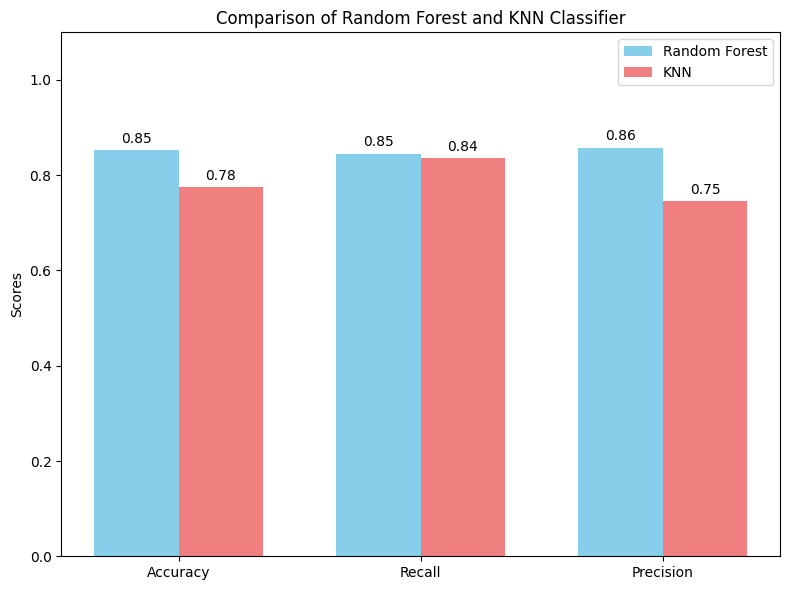

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
metrics = ['Accuracy', 'Recall', 'Precision']

# Scores
random_forest_scores = [accuracy, recall, precision]
knn_scores = [accuracy_knn, recall_knn, precision_knn]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, random_forest_scores, width, label='Random Forest', color='skyblue')
rects2 = ax.bar(x + width/2, knn_scores, width, label='KNN', color='lightcoral')

# Add labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Random Forest and KNN Classifier')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)  # since scores are between 0 and 1
ax.legend()

# Function to add value labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_classifier = SVC(kernel='linear')  # you can also try 'rbf' or 'poly' kernels
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_test_svm = svm_classifier.predict(X_test)

# Evaluate on the test set
accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
recall_svm = recall_score(y_test, y_pred_test_svm)
precision_svm = precision_score(y_test, y_pred_test_svm)

print("\nSVM Classifier - Test Set Metrics:")
print("Accuracy:", accuracy_svm)
print("Recall:", recall_svm)
print("Precision:", precision_svm)